# Goal: use LUR + Kriging to do interpolation
- access OSM via python: https://pygis.io/docs/d_access_osm.html

# download OSM data

In [1]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib as plt

In [10]:
place_name = "Los Angeles County, CA, USA"
area = ox.geocode_to_gdf(place_name)
area

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"MULTIPOLYGON (((-118.95172 33.99286, -118.9456...",-118.951722,32.75004,-117.64627,34.823312,291351125,relation,396479,34.315507,-118.209681,boundary,administrative,12,0.641225,county,Los Angeles County,"Los Angeles County, California, United States"


<Axes: >

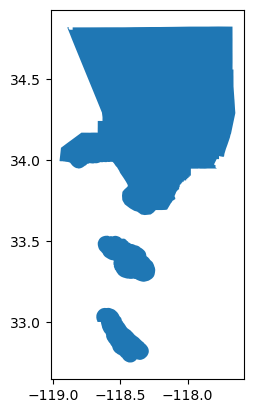

In [14]:
area.plot()

In [25]:
# Landuse data
landuse_tags = {"landuse": True}

ox.settings.requests_kwargs = {"verify": False}

landuse = ox.features_from_place(place_name, landuse_tags)
landuse = landuse[landuse.geometry.type.isin(["Polygon", "MultiPolygon"])]

C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'overpass-api.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'overpass-api.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'overpass-api.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\jduan\A

In [44]:
park_tags = {"leisure": ["park", "garden", "recreation_ground"]}
parks = ox.features_from_place(place_name, park_tags)

C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'overpass-api.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'overpass-api.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'overpass-api.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\jduan\A

In [46]:
# street network
G = ox.graph_from_place(place_name, network_type = "drive")
edges = ox.graph_to_gdfs(G, nodes = False, edges = True)
edges.to_file("../Data/Output/OSM/edgewood_drive_roads.shp")

C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'overpass-api.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'overpass-api.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'overpass-api.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\jduan\A

In [74]:
# download them as shp
keep = ["landuse"]
landuse = landuse[ keep + ["geometry"] ]
landuse.to_file("../Data/Output/OSM/edgewood_landuse.shp", driver = "ESRI Shapefile")

In [72]:
parks.to_file("../Data/Output/OSM/parks.shp", driver = "ESRI Shapefile")

C:\Users\jduan\AppData\Local\Temp\ipykernel_6656\2441474611.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  parks.to_file("../Data/Output/OSM/parks.shp", driver = "ESRI Shapefile")
C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'gnis:feature_id' to 'gnis_featu'
  ogr_write(
C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'garden:type' to 'garden_typ'
  ogr_write(
C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'opening_hours' to 'opening_ho'
  ogr_write(
C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'garden:style' to 'garden_sty'
  ogr_write(
C:\Users\jduan\AppData\Local\anaconda3\Lib\site-packages\pyogrio\raw.py:723:

FeatureError: Could not add feature to layer at index 208: Attempt to write non-point (POLYGON) geometry to point shapefile.

In [93]:
# landuse.plot()
landuse['landuse'].value_counts()[:20]

landuse
residential          13754
grass                 8391
retail                2613
commercial            2124
industrial            1424
brownfield             797
religious              690
construction           592
meadow                 326
forest                 272
farmland               238
recreation_ground      227
plant_nursery          212
railway                 97
cemetery                89
farmyard                87
military                85
village_green           82
basin                   81
vineyard                46
Name: count, dtype: int64

geometry  ele  \
element id                                                                   
node    358779407                         POINT (-118.48536 34.17639)  214   
        358779974                         POINT (-118.18955 34.10409)  198   
        358781336                         POINT (-118.28349 33.70989)    2   
        358781520                          POINT (-118.1884 33.87585)   16   
        358782668                         POINT (-118.25924 34.22528)  439   
...                                                               ...  ...   
way     1372727248  POLYGON ((-118.39737 33.94457, -118.3974 33.94...  NaN   
        1372727252  POLYGON ((-118.40169 33.94406, -118.40158 33.9...  NaN   
        1372727256  POLYGON ((-118.40258 33.94317, -118.40258 33.9...  NaN   
        1372727257  POLYGON ((-118.39751 33.94363, -118.39747 33.9...  NaN   
        1373847800  POLYGON ((-118.53958 34.2529, -118.53936 34.25...  NaN   

                   gnis:feature_id leisure                           name  \
element id                                                                  
node    358779407           238367    park  Sepulveda Dam Recreation Area   
        358779974           238773    park               Arroyo Seco Park   
        358781336           239955    park            Cabrillo Beach Park   
        358781520           240112    park                    Camp Suanga   
        358782668           241091    park          Crescenta Valley Park   
...                            ...     ...                            ...   
way     1372727248             NaN  garden                            NaN   
        1372727252             NaN  garden                            NaN   
        1372727256             NaN  garden                            NaN   
        1372727257             NaN  garden                            NaN   
        1373847800             NaN  garden                            NaN   

                     wikidata fixme amenity check_date website  ... type  \
element id                                                      ...        
node    358779407   Q49559687   NaN     NaN        NaN     NaN  ...  NaN   
        358779974   Q49472984   NaN     NaN        NaN     NaN  ...  NaN   
        358781336         NaN   NaN     NaN        NaN     NaN  ...  NaN   
        358781520   Q49476709   NaN     NaN        NaN     NaN  ...  NaN   
        358782668   Q49480955   NaN     NaN        NaN     NaN  ...  NaN   
...                       ...   ...     ...        ...     ...  ...  ...   
way     1372727248        NaN   NaN     NaN        NaN     NaN  ...  NaN   
        1372727252        NaN   NaN     NaN        NaN     NaN  ...  NaN   
        1372727256        NaN   NaN     NaN        NaN     NaN  ...  NaN   
        1372727257        NaN   NaN     NaN        NaN     NaN  ...  NaN   
        1373847800        NaN   NaN     NaN        NaN     NaN  ...  NaN   

                   highway genus:en construction source:url meadow  FID  \
element id                                                                
node    358779407      NaN      NaN          NaN        NaN    NaN  NaN   
        358779974      NaN      NaN          NaN        NaN    NaN  NaN   
        358781336      NaN      NaN          NaN        NaN    NaN  NaN   
        358781520      NaN      NaN          NaN        NaN    NaN  NaN   
        358782668      NaN      NaN          NaN        NaN    NaN  NaN   
...                    ...      ...          ...        ...    ...  ...   
way     1372727248     NaN      NaN          NaN        NaN    NaN  NaN   
        1372727252     NaN      NaN          NaN        NaN    NaN  NaN   
        1372727256     NaN      NaN          NaN        NaN    NaN  NaN   
        1372727257     NaN      NaN          NaN        NaN    NaN  NaN   
        1373847800     NaN      NaN          NaN        NaN    NaN  NaN   

                   source:start_date:url source:start_date:url2 proposed:name  

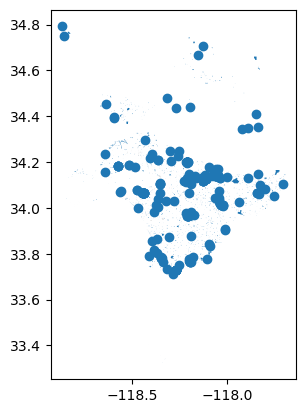

In [52]:
parks.plot()
parks

osmid  \
u           v          key                                                    
653656      1718677597 0                                          159763316   
            123189012  0    [1094670073, 1094670074, 1055876622, 383059215]   
            122697159  0     [1050285331, 1050285330, 399239123, 399239118]   
            1718756337 0                             [399258376, 399258374]   
653681      26427612   0                  [49287146, 1215909510, 149003055]   
...                                                                     ...   
12461746836 3716058615 1                                         1347177140   
            916287289  0                    [97819225, 97819226, 367716143]   
12526726244 3701934377 0                                          366209006   
                       1                                          366209006   
            3701934357 0                                          366209006   

                                 highway      lanes maxspeed  \
u           v          key                                     
653656      1718677597 0       secondary          4   40 mph   
            123189012  0         primary  [6, 5, 4]      NaN   
            122697159  0         primary  [6, 5, 4]      NaN   
            1718756337 0        tertiary     [5, 4]      NaN   
653681      26427612   0        motorway     [6, 5]   65 mph   
...                                  ...        ...      ...   
12461746836 3716058615 1    unclassified        NaN      NaN   
            916287289  0    unclassified        NaN      NaN   
12526726244 3701934377 0     residential        NaN      NaN   
                       1     residential        NaN      NaN   
            3701934357 0     residential        NaN      NaN   

                                                 name  oneway reversed  \
u           v          key                                               
653656      1718677597 0         West Florence Avenue   False    False   
            123189012  0    West Manchester Boulevard   False    False   
            122697159  0       West Manchester Avenue   False     True   
            1718756337 0           Aviation Boulevard   False    False   
653681      26427612   0            San Diego Freeway    True    False   
...                                               ...     ...      ...   
12461746836 3716058615 1               Hard Luck Road   False     True   
            916287289  0              Los Alamos Road   False     True   
12526726244 3701934377 0                          NaN   False    False   
                       1                          NaN   False     True   
            3701934357 0                          NaN   False     True   

                                 length  \
u           v          key                
653656      1718677597 0     253.851490   
            123189012  0     159.911386   
            122697159  0     161.242924   
            1718756337 0     402.734149   
653681      26427612   0     252.270522   
...                                 ...   
12461746836 3716058615 1      84.711791   
            916287289  0    4745.746888   
12526726244 3701934377 0      56.220999   
                       1     236.668059   
            3701934357 0     138.499626   

                                                                     geometry  \
u           v          key                                                      
653656      1718677597 0    LINESTRING (-118.37705 33.9599, -118.37705 33....   
            123189012  0    LINESTRING (-118.37705 33.9599, -118.37693 33....   
            122697159  0    LINESTRING (-118.37705 33.9599, -118.37719 33....   
            1718756337 0    LINESTRING (-118.37705 33.9599, -118.37705 33....   
653681      26427612   0    LINESTRING (-118.40031 33.9894, -118.40048 33....   
...                                                                       ...   
12461746836 3716058615 1    LINESTRING

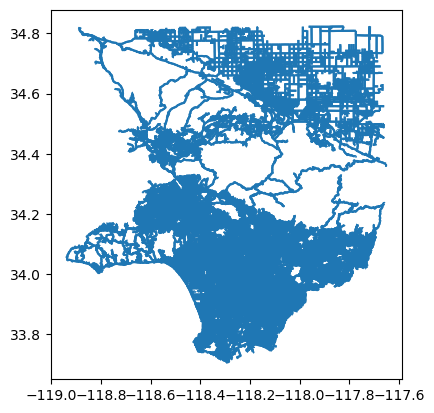

In [57]:
edges.plot()
edges

In [81]:
edges['highway'].value_counts()

highway
residential                       315904
tertiary                           56512
secondary                          40282
primary                            29996
unclassified                        6887
motorway_link                       3917
motorway                            2662
primary_link                        1681
secondary_link                       902
trunk                                723
tertiary_link                        446
[tertiary, residential]              312
living_street                        179
[residential, unclassified]          165
busway                               133
trunk_link                            67
[tertiary, secondary]                 30
[tertiary, unclassified]              24
[residential, secondary]              10
[primary, secondary]                   8
escape                                 5
[tertiary, motorway_link]              5
[secondary, motorway_link]             4
[motorway, motorway_link]              4
[primary

# feature selection

In [239]:
import statsmodels.api as sm

In [241]:
LU = gpd.read_file('../Data/Output/OSM/edgewood_landuse.shp')
PARK = gpd.read_file('../Data/Output/OSM/parks.shp')
STREET = gpd.read_file('../Data/Output/OSM/edgewood_drive_roads.shp')
PA = gpd.read_file('../Data/Output/PurpleAir_after_Calibration.shp')

In [416]:
PA = gpd.read_file('../Data/Output/PurpleAir_after_Calibration.shp')
PA.head(1)

,Unnamed_ 0,sensor_id,date,time_stamp,rssi,uptime_x,pa_latency,humidity_a,humidity_b,temperatur,...,confidence,pm25_avg,PurpleAir_,PurpleAi_1,PurpleAi_2,PA_PM25_ca,PA_PM25__1,diff_05,diff_025,geometry
0,0,100025,2021-02-15,1613347200,-75.0,81801.0,0.0,36.948,0.0,68.152,...,100,5.811,5.811,18.474,34.076,7.637712,7.861328,2.050328,1.826712,POINT (-118.11396 34.17057)


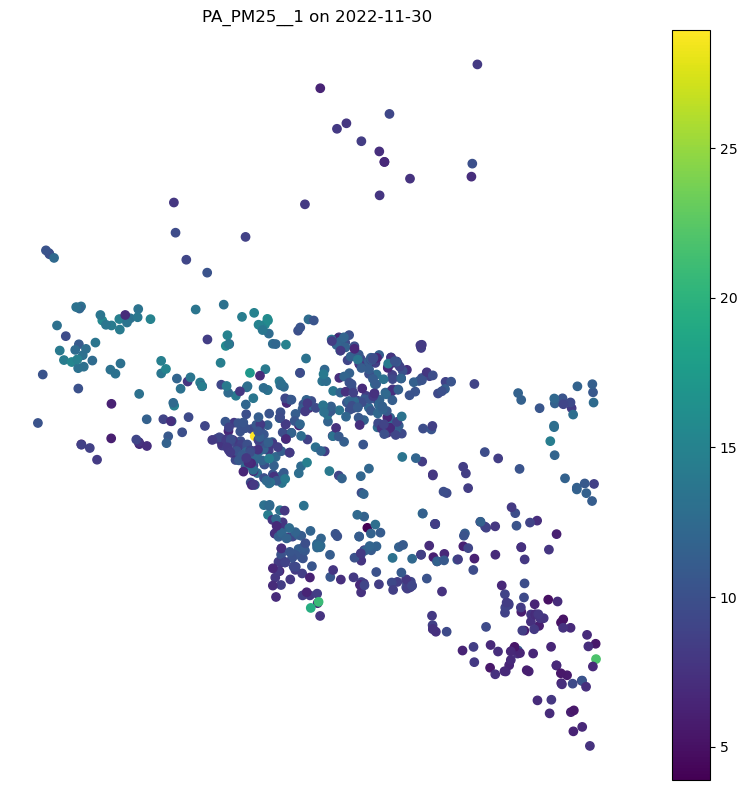

In [420]:
PA_20221130 = PA[PA['date'] == '2022-11-30']

# 2. 计算颜色映射的最小/最大值
vmin, vmax = PA_20221130['PA_PM25__1'].min(), PA_20221130['PA_PM25__1'].max()

# 3. 创建 Normalize 对象，将数据值映射到 [0,1]
norm = Normalize(vmin=vmin, vmax=vmax)

# 4. 绘图
fig, ax = plt.subplots(figsize=(10, 8))
PA_20221130.plot(
    column='PA_PM25__1',      # 按这个字段着色
    cmap='viridis',           # 颜色映射方案
    norm=norm,                # 使用上面定义的归一化
    legend=True,              # 显示图例
    ax=ax
)

ax.set_title("PA_PM25__1 on 2022-11-30")
ax.set_axis_off()            # 隐藏坐标轴

plt.tight_layout()
plt.show()

In [242]:
target_crs = "EPSG:3310"
LU = LU.to_crs(target_crs)
PARK = PARK.to_crs(target_crs)
STREET = STREET.to_crs(target_crs)
PA = PA.to_crs(target_crs)

In [243]:
LU

,element,id,landuse,geometry
0,relation,317709,military,"POLYGON ((139891.436 -569764.197, 139476.925 -..."
1,relation,317709,military,"POLYGON ((139891.436 -569764.197, 139476.925 -..."
2,relation,1820540,farmland,"POLYGON ((183884.479 -367646.647, 183482.031 -..."
3,relation,1820541,farmland,"POLYGON ((189907.546 -364392.096, 189915.564 -..."
4,relation,1820542,farmland,"POLYGON ((188986.039 -385877.991, 188817.412 -..."
...,...,...,...,...
32490,way,1380626814,brownfield,"POLYGON ((165639.711 -442190.227, 165649.917 -..."
32491,way,1381070041,brownfield,"POLYGON ((155886.632 -434968.407, 155902.766 -..."
32492,way,1381070046,brownfield,"POLYGON ((155781.174 -435070.485, 155795.949 -..."
32493,way,1381070059,brownfield,"POLYGON ((155640.022 -435607.29, 155680.888 -4..."


In [25]:
selected_types = [
    'residential', 'grass', 'retail', 'commercial', 'industrial', 'brownfield',
    'religious', 'construction', 'meadow', 'forest', 'farmland', 'recreation_ground',
    'plant_nursery', 'railway', 'cemetery', 'farmyard', 'military', 'village_green'
]

landuse_types = LU[LU['landuse'].isin(selected_types)].copy()

<Axes: >

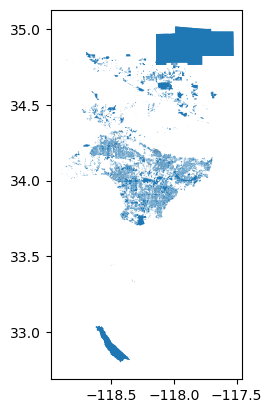

In [27]:
landuse_types.plot()

In [47]:
STREET

,u,v,key,osmid,highway,lanes,maxspeed,name,oneway,reversed,length,bridge,ref,access,tunnel,junction,width,service,geometry
0,653656,1718677597,0,159763316,secondary,4,40 mph,West Florence Avenue,False,False,253.851490,None,None,None,None,None,None,None,"LINESTRING (150004.329 -449331.255, 150004.519..."
1,653656,123189012,0,"[1094670073, 1094670074, 1055876622, 383059215]",primary,"['6', '5', '4']",None,West Manchester Boulevard,False,False,159.911386,None,None,None,None,None,None,None,"LINESTRING (150004.329 -449331.255, 150016.071..."
2,653656,122697159,0,"[1050285331, 1050285330, 399239123, 399239118]",primary,"['6', '5', '4']",None,West Manchester Avenue,False,True,161.242924,None,None,None,None,None,None,None,"LINESTRING (150004.329 -449331.255, 149991.72 ..."
3,653656,1718756337,0,"[399258376, 399258374]",tertiary,"['5', '4']",None,Aviation Boulevard,False,False,402.734149,None,None,None,None,None,None,None,"LINESTRING (150004.329 -449331.255, 150004.701..."
4,653681,26427612,0,"[49287146, 1215909510, 149003055]",motorway,"['6', '5']",65 mph,San Diego Freeway,True,False,252.270522,yes,I 405,None,None,None,None,None,"LINESTRING (147799.553 -446095.574, 147783.667..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460872,12461746836,3716058615,1,1347177140,unclassified,None,None,Hard Luck Road,False,True,84.711791,None,FR 7N32,None,None,None,None,None,"LINESTRING (108057.432 -367599.458, 108076.005..."
460873,12461746836,916287289,0,"[97819225, 97819226, 367716143]",unclassified,None,None,Los Alamos Road,False,True,4745.746888,yes,FR 7N32,None,None,None,None,None,"LINESTRING (108057.432 -367599.458, 108047.081..."
460874,12526726244,3701934377,0,366209006,residential,None,None,None,False,False,56.220999,None,None,None,None,None,None,None,"LINESTRING (127018.418 -392512.551, 127011.136..."
460875,12526726244,3701934377,1,366209006,residential,None,None,None,False,True,236.668059,None,None,None,None,None,None,None,"LINESTRING (127018.418 -392512.551, 127018.407..."


# Clean landuse data
- change "other" column
  

In [44]:
lu_csv.to_csv('../Data/Output/landuseReg_data.csv')

In [52]:
PA['sensor_id'].value_counts()

sensor_id
39155     729
80033     729
30057     728
80859     728
85621     727
         ... 
32807       1
89999       1
3860        1
105100      1
6156        1
Name: count, Length: 1493, dtype: int64

# landuse regression model

In [246]:
import pandas as pd, geopandas as gpd
from shapely.geometry import Point
from pyproj import CRS
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV 
import gstools as gs
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box

In [248]:
lu_df = pd.read_csv("../Data/Output/landuseReg_data.csv")
lu_df.head(1)

,sensor_id,dist_res_m,dist_ter_m,dist_sec_m,dist_pri_m,residential,grass,retail,commercial,industrial,...,forest,farmland,recreation_ground,plant_nursery,railway,cemetery,farmyard,military,village_green,others
0,417,4.744658,249.558239,99999.0,545.546635,0.0,0.0359,0.0012,0.0006,0.0298,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [250]:
PA.head(1)
PA.columns = ['Unnamed_ 0', 'sensor_id', 'date', 'time_stamp', 'rssi', 'uptime_x',
               'pa_latency', 'humidity_a', 'humidity_b', 'temperatur', 'temperat_1',
               'pressure_a', 'pressure_b', 'voc_a', 'voc_b', 'pm2.5_atm_',
               'pm2.5_at_1', 'pm10.0_atm', 'pm10.0_a_1', 'sensor_ind', 'date_creat',
               'location_t', 'model', 'uptime_y', 'position_r', 'latitude',
               'longitude', 'altitude', 'confidence', 'pm25_avg', 'PA_PM25',
               'PA_RH', 'PA_T', 'PA_PM25cali_025', 'PA_PM25cali_05', 'diff_05',
               'diff_025', 'geometry']

In [252]:
PA_lu_gdf = PA.merge(lu_df, on = "sensor_id")

In [254]:
PA_lu_gdf.columns

Index(['Unnamed_ 0', 'sensor_id', 'date', 'time_stamp', 'rssi', 'uptime_x',
       'pa_latency', 'humidity_a', 'humidity_b', 'temperatur', 'temperat_1',
       'pressure_a', 'pressure_b', 'voc_a', 'voc_b', 'pm2.5_atm_',
       'pm2.5_at_1', 'pm10.0_atm', 'pm10.0_a_1', 'sensor_ind', 'date_creat',
       'location_t', 'model', 'uptime_y', 'position_r', 'latitude',
       'longitude', 'altitude', 'confidence', 'pm25_avg', 'PA_PM25', 'PA_RH',
       'PA_T', 'PA_PM25cali_025', 'PA_PM25cali_05', 'diff_05', 'diff_025',
       'geometry', 'dist_res_m', 'dist_ter_m', 'dist_sec_m', 'dist_pri_m',
       'residential', 'grass', 'retail', 'commercial', 'industrial',
       'brownfield', 'religious', 'construction', 'meadow', 'forest',
       'farmland', 'recreation_ground', 'plant_nursery', 'railway', 'cemetery',
       'farmyard', 'military', 'village_green', 'others'],
      dtype='object')

In [256]:
PA_lu_gdf_20221130 = PA_lu_gdf[PA_lu_gdf['date'] == '2022-11-30']
PA_lu_gdf_20221130

,Unnamed_ 0,sensor_id,date,time_stamp,rssi,uptime_x,pa_latency,humidity_a,humidity_b,temperatur,...,forest,farmland,recreation_ground,plant_nursery,railway,cemetery,farmyard,military,village_green,others
533,898,100111,2022-11-30,1669766400,-86.0,1760654.0,779.0,54.328,0.0,59.837,...,0.0000,0.0,0.0,0.0,0.0,0,0,0,0,0
1936,2515,100715,2022-11-30,1669766400,-27.0,2154840.0,200.0,29.733,0.0,76.962,...,0.0000,0.0,0.0,0.0,0.0,0,0,0,0,0
2522,3109,101081,2022-11-30,1669766400,-52.0,3084919.0,225.0,57.743,0.0,57.285,...,0.0000,0.0,0.0,0.0,0.0,0,0,0,0,0
4239,4860,101629,2022-11-30,1669766400,-71.0,1793521.0,442.0,59.220,0.0,61.149,...,0.0000,0.0,0.0,0.0,0.0,0,0,0,0,0
5078,5756,102032,2022-11-30,1669766400,-57.0,420088.0,330.0,46.498,0.0,61.105,...,0.0000,0.0,0.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550601,709609,98775,2022-11-30,1669766400,-76.0,3077342.0,223.0,55.378,0.0,62.969,...,0.0000,0.0,0.0,0.0,0.0,0,0,0,0,0
551061,710082,99139,2022-11-30,1669766400,-81.0,879313.0,640.0,47.151,0.0,61.109,...,0.0028,0.0,0.0,0.0,0.0,0,0,0,0,0
551709,710741,99315,2022-11-30,1669766400,-46.0,3080826.0,240.0,33.299,0.0,76.281,...,0.0000,0.0,0.0,0.0,0.0,0,0,0,0,0
552139,711198,99345,2022-11-30,1669766400,-82.0,474600.0,347.0,46.203,0.0,61.001,...,0.0000,0.0,0.0,0.0,0.0,0,0,0,0,0


In [263]:
# coords = np.vstack([PA_lu_gdf_20221130.geometry.x, PA_lu_gdf_20221130.geometry.y])
# vals   = PA_lu_gdf_20221130["residual"].values # true PM2.5 − pred LUR 

# bins, gamma = gs.vario_estimate(coords, vals) # Experimental Variogram

# fig, ax = plt.subplots()
# ax.scatter(bins, gamma)
# ax.set_xlabel("Distance")
# ax.set_ylabel("Semivariance")
# ax.set_title("Experimental Variogram: Semivariance vs Distance")
# plt.tight_layout()
# plt.show()

# fit Kriging + LUR
步骤一：克里金插值（建立空间基准）
1.1 在所有观测点上，用校准后的 PM₂.₅ 数据计算经验变异函数，拟合指数模型（含 nugget）。
1.2 对每个待估格子中心点（grid.centroid）执行 Ordinary Kriging，得到初步的 PM₂.₅ 空间面。
1.3 对观测站点做留一交叉（LOOCV）克里金插值，得到每个站点的“克里金预测”值 

步骤二：地理回归 (LUR) 模型拟合
2.1 构建观测站点的特征矩阵 X
X：包含 1 mile 缓冲区内的 land‐use 百分比和与不同道路类型的最小距离。
2.2 以估计的克里金作为因变量，用岭回归（RidgeCV）拟合 LUR 模型，获取回归系数。

步骤三：对所有格子点做最终预测
3.1 对每个格子中心的 1 mile 缓冲区，同样计算 land‐use 百分比和道路距离，形成 Xgrid
3.2 用已经训练好的 Ridge 模型对 Xgrid 做预测，得到最终的 PM₂.₅ 估计面。

In [362]:
import osmnx as ox
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import box
from shapely.ops import unary_union
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
import gstools as gs
from gstools import Exponential, krige
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW

In [372]:
place_name = "Los Angeles County, CA, USA"
area = ox.geocode_to_gdf(place_name).to_crs(epsg=3310)
step = 1.0 * 1609.344  # 米
minx, miny, maxx, maxy = area.total_bounds

polys, gids = [], []
i = 0
x = minx
while x < maxx:
    y = miny
    while y < maxy:
        cell = box(x, y, x+step, y+step)
        if cell.intersects(area.unary_union):
            polys.append(cell.intersection(area.unary_union))
            gids.append(f"cell_{i}")
            i += 1
        y += step
    x += step

grid = gpd.GeoDataFrame({"gid": gids, "geometry": polys}, crs=area.crs)
grid["centroid"] = grid.geometry.centroid

y_thresh = -480000  
grid_main = grid[grid.centroid.y > y_thresh].copy()

C:\Users\jduan\AppData\Local\Temp\ipykernel_18500\3042123291.py:13: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  if cell.intersects(area.unary_union):
C:\Users\jduan\AppData\Local\Temp\ipykernel_18500\3042123291.py:14: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polys.append(cell.intersection(area.unary_union))


<Axes: >

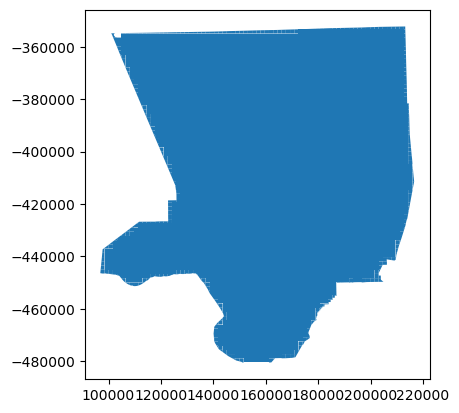

In [374]:
grid_main.plot()

In [380]:
# —— 前置：GeoDataFrame 加载与投影 —— 
PA = PA_lu_gdf_20221130.to_crs(epsg=3310).copy()
grid = grid_main.to_crs(epsg=3310).copy()

# —— 步骤一：Kriging —— 
# 1.1 variogram 拟合
coords = np.vstack([PA.geometry.x.values, PA.geometry.y.values])
coords_km = coords / 1000
vals = PA["PA_PM25cali_05"].values

bin_edges = np.linspace(0, 50, 31)
bin_centers, gamma = gs.vario_estimate(coords_km, vals, bin_edges=bin_edges)

model = gs.Exponential(dim=2)
model.fit_variogram(bin_centers, gamma, nugget=True)

# 1.2 网格插值
grid_centroids = grid.geometry.centroid
grid_coords = np.vstack([grid_centroids.x.values, grid_centroids.y.values]) / 1000

ok = krige.Ordinary(model, cond_pos=coords_km, cond_val=vals, exact=True)
grid["pm25_krig"] = ok((grid_coords[0], grid_coords[1]))[0]

# 1.3 站点 LOOCV Kriging
N = coords_km.shape[1]
y_krig_loocv = np.zeros(N)
for i in range(N):
    mask = np.arange(N) != i
    ok_i = krige.Ordinary(model,
                          cond_pos=coords_km[:, mask],
                          cond_val=vals[mask],
                          exact = True)
    y_krig_loocv[i] = ok_i((coords_km[0, i], coords_km[1, i]))[0]
PA["pm25_krig_loocv"] = y_krig_loocv


In [402]:
r2_score(PA["PA_PM25cali_05"], PA["pm25_krig_loocv"])

0.33979175070901224

In [388]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# —— 步骤二：LUR 回归 —— 
# 2.1 特征
features = [
    'dist_res_m','dist_ter_m','dist_sec_m','dist_pri_m',
    'residential','grass','retail','commercial','industrial',
    'brownfield','religious','construction','meadow','forest',
    'farmland','recreation_ground','plant_nursery','railway',
    'cemetery','farmyard','military','village_green'
]
X = PA[features].fillna(0).values

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    oob_score=True
)
rf.fit(X, y_krig_loocv)
print("OOB R²:", rf.oob_score_)
print("RF LOOCV R²:", r2_score(y_krig_loocv, rf.predict(X)))

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X, y_krig_loocv)
print("XGB LOOCV R²:", r2_score(y_krig_loocv, xgb.predict(X)))

OOB R²: 0.24876133215795804
RF LOOCV R²: 0.4789030132084585
XGB LOOCV R²: 0.5877606449982828


In [390]:
# 3.2 计算每格子中心 1 mile 缓冲区的 lu_pct 与道路距离
mile = 1609.344
keep_lu = [
    'residential','grass','retail','commercial','industrial','brownfield',
    'religious','construction','meadow','forest','farmland','recreation_ground',
    'plant_nursery','railway','cemetery','farmyard','military','village_green'
]
LU = gpd.read_file('../Data/Output/OSM/edgewood_landuse.shp') \
        .to_crs(epsg = 3310)
LU = LU[LU['landuse'].isin(keep_lu)].rename(columns = {'landuse':'lu_class'})

highways = ['residential','tertiary','secondary','primary']
ST = gpd.read_file('../Data/Output/OSM/edgewood_drive_roads.shp') \
         .to_crs(epsg = 3310)
ST = ST[ST['highway'].isin(highways)]

# 缓冲 + 叠置 == 百分比
grid_main["buffer"] = grid_main.centroid.buffer(mile)
buf = grid_main[['gid','buffer']].rename(columns = {'buffer':'geometry'}).set_geometry('geometry')
inter = gpd.overlay(buf, LU[['lu_class','geometry']], how='intersection')
inter['area'] = inter.geometry.area
grid_main['buf_area'] = grid_main.geometry.area

lu_area = inter.groupby(['gid','lu_class'])['area'].sum().unstack(fill_value=0)
lu_pct  = lu_area.div(grid_main.set_index('gid')['buf_area'], axis = 0).reset_index()
grid_main = grid_main.merge(lu_pct, on='gid', how='left').fillna(0)

# 道路距离（unary_union 方式）- distance>2 mile 则距离为999
max_dist = 2 * 1609.344  # ≈ 3218.688 m
road_unions = {
    hw: unary_union(ST.loc[ST.highway == hw, 'geometry'])
    for hw in highways
}
for hw in highways:
    union_geom = road_unions[hw]
    col = f"dist_{hw[:3]}_m"
    grid_main.loc[:, col] = grid_main.centroid.apply(
        lambda p, ug=union_geom, md=max_dist: ug.distance(p) if ug.distance(p) <= md else 99999
    )

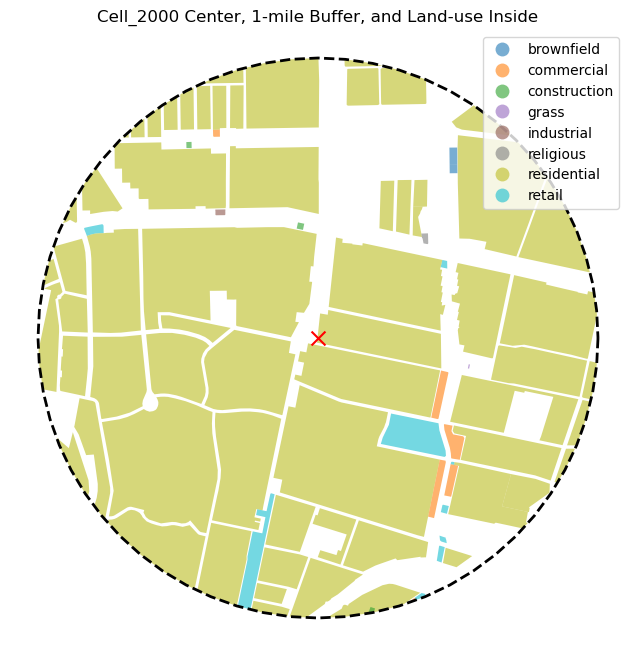

In [391]:
# test!!!
cell0 = grid_main[grid_main["gid"] == "cell_2000"].copy()

# 3. 计算中心点和 1 mile 缓冲
mile = 1609.344
cell0["centroid"] = cell0.geometry.centroid
cell0["buffer"]   = cell0.centroid.buffer(mile)

# 4. 读取并过滤 landuse 图层
keep_lu = [
    'residential','grass','retail','commercial','industrial','brownfield',
    'religious','construction','meadow','forest','farmland','recreation_ground',
    'plant_nursery','railway','cemetery','farmyard','military','village_green'
]
LU = (
    gpd.read_file("../Data/Output/OSM/edgewood_landuse.shp")
       .to_crs(cell0.crs)
)
LU = LU[LU["landuse"].isin(keep_lu)].rename(columns={"landuse":"lu_class"})

# 5. 取缓冲区与 landuse 的交集
buf_gdf = (
    cell0[["gid","buffer"]]
    .rename(columns={"buffer":"geometry"})
    .set_geometry("geometry")
)
inter = gpd.overlay(buf_gdf, LU[["lu_class","geometry"]], how="intersection")

# 6. 绘图
fig, ax = plt.subplots(1,1, figsize=(8,8))
# landuse
inter.plot(
    ax=ax,
    column="lu_class",
    categorical=True,
    legend=True,
    alpha=0.6,
    edgecolor="none"
)
# buffer 边界
buf_gdf.plot(
    ax=ax,
    facecolor="none",
    edgecolor="black",
    linestyle="--",
    linewidth=2
)
# 中心点
cell0.set_geometry("centroid").plot(
    ax=ax,
    color="red",
    marker="x",
    markersize=100
)

ax.set_title("Cell_2000 Center, 1-mile Buffer, and Land-use Inside")
ax.set_axis_off()
plt.show()

In [392]:
# 3.3 用 LUR 模型预测
X_grid = grid_main[features].fillna(0)
grid_main["pm25_lur"] = xgb.predict(X_grid)

In [393]:
grid_main.columns

Index(['gid', 'geometry', 'centroid', 'buffer', 'buf_area', 'brownfield',
       'cemetery', 'commercial', 'construction', 'farmland', 'farmyard',
       'forest', 'grass', 'industrial', 'meadow', 'military', 'plant_nursery',
       'railway', 'recreation_ground', 'religious', 'residential', 'retail',
       'village_green', 'dist_res_m', 'dist_ter_m', 'dist_sec_m', 'dist_pri_m',
       'pm25_lur'],
      dtype='object')

PM₂.₅ 预测值范围：[8.31, 12.67] µg/m³


C:\Users\jduan\AppData\Local\Temp\ipykernel_18500\1864666430.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


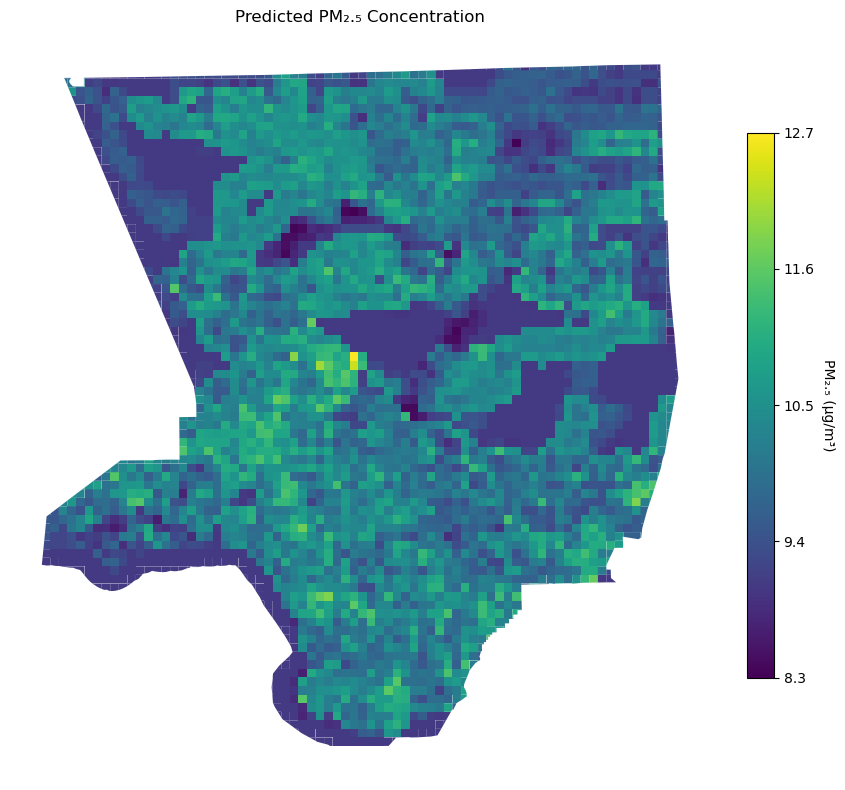

In [414]:
from matplotlib import cm
from matplotlib.colors import Normalize

# 1. 确认使用 pm25_lur，并查看它的实际范围
vmin = grid_main['pm25_lur'].min()
vmax = grid_main['pm25_lur'].max()
print(f"PM₂.₅ 预测值范围：[{vmin:.2f}, {vmax:.2f}] µg/m³")

# 2. 创建 ScalarMappable，用于精细控制 colorbar
norm = Normalize(vmin=vmin, vmax=vmax)      # ← 下限改成 vmin
cmap = cm.get_cmap('viridis')
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # 只是用来构造 colorbar

# 3. 绘制网格
fig, ax = plt.subplots(figsize=(10, 8))
grid_main.plot(
    column='pm25_lur',
    cmap=cmap,
    norm=norm,
    linewidth=0,
    ax=ax
)
ax.set_title("Predicted PM₂.₅ Concentration")
ax.set_axis_off()

# 4. 添加 colorbar 并自定义刻度
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label("PM₂.₅ (µg/m³)", rotation=270, labelpad=15)

# 设置 5 个刻度，从 vmin 到 vmax
ticks = np.linspace(vmin, vmax, 5)
cbar.set_ticks(ticks)
cbar.set_ticklabels([f"{t:.1f}" for t in ticks])

plt.tight_layout()
plt.show()

<Axes: >

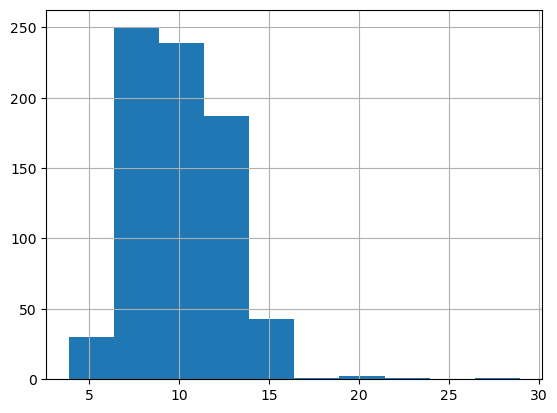

In [410]:
(min(PA["PA_PM25cali_05"]),max(PA["PA_PM25cali_05"]))
PA["PA_PM25cali_05"].hist()

<Axes: >

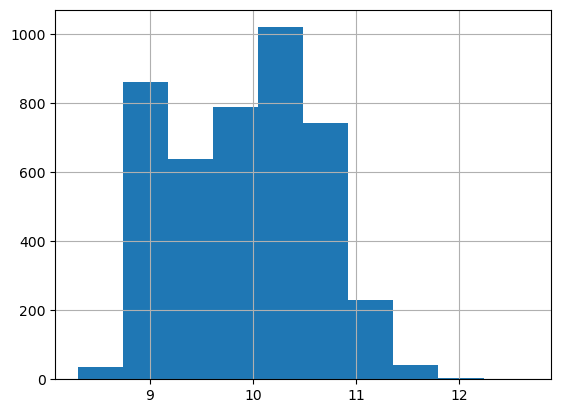

In [412]:
grid_main['pm25_lur'].hist()